In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Read the CSV file
df = pd.read_csv('/kaggle/input/dataset2/data2.csv')

columns = ['Trk','Frame','x', 'y', 'Vxy_smoothed','acceleration','label']
data = df[columns]

In [3]:
# data analysis code


# import pandas as pd
# from scipy.stats import zscore
# import numpy as np
# from scipy.stats import mode
# import matplotlib.pyplot as plt

# # Read data from CSV
# df = pd.read_csv('filtered_data.csv')
# hard_columns = ['Trk','x', 'y', 'Vxy_smoothed','acceleration']
# newData = df[hard_columns]
# newData.drop_duplicates(inplace=True)

# # V_max  = df['Vxy_smoothed'].max()
# # V_min = df['Vxy_smoothed'].min()
# # V_variance = df['Vxy_smoothed'].var()
# # V_mean = df['Vxy_smoothed'].mean()

# # A_max  = df['acceleration'].max()  
# # A_min = df['acceleration'].min()
# # A_variance = df['acceleration'].var()
# # A_mean = df['acceleration'].mean()



# # print("V_max:", V_max)
# # print("V_min:", V_min)
# # print("V_variance:", V_variance)
# # print("V_mean:", V_mean)

# # print("A_max:", A_max)
# # print("A_min:", A_min)
# # print("A_variance:", A_variance)
# # print("A_mean:", A_mean)

# # # Calculate mean and standard deviation for Vxy_smoothed and acceleration
# # V_mean = df['Vxy_smoothed'].mean()
# # V_std = df['Vxy_smoothed'].std()

# # A_mean = df['acceleration'].mean()
# # A_std = df['acceleration'].std()

# # # Define the range for V and A (e.g., ±2 standard deviations from the mean)
# # V_range = (V_mean - 2 * V_std, V_mean + 2 * V_std)
# # A_range = (A_mean - 2 * A_std, A_mean + 2 * A_std)

# # print("Range for Vxy_smoothed:", V_range)
# # print("Range for acceleration:", A_range)

# # # Filter data points within the range of velocity (V) and acceleration (A)
# # filtered_data_V = df[((df['Vxy_smoothed'] >= V_range_min) & (df['Vxy_smoothed'] <= V_range_max)) & ((df['acceleration'] >= A_range_min) & (df['acceleration'] <= A_range_max))]


# # # Count the number of data points in each filtered data
# # num_data_points_V = len(filtered_data_V)
# # print("Number of data points within the range of velocity (V):", num_data_points_V)

# frequency_counts = newData['Vxy_smoothed'].value_counts()

# # Plotting
# plt.figure(figsize=(10, 6))
# bars = plt.bar(frequency_counts.index, frequency_counts.values, color='blue', edgecolor='black')
# plt.xlabel('Vxy_smoothed')
# plt.ylabel('Frequency')
# plt.title('Frequency vs Vxy_smoothed')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
# plt.tight_layout()

# # Adding values on top of the bars
# for bar in bars:
#     plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

# plt.show()


In [4]:
# labelling Code
# import pandas as pd
# from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt


# def assign_label(row):
#     if row['Vxy_smoothed'] < 1 and -1 <= row['acceleration'] <= 1:
#         return 'hard'
#     elif 5 <= row['Vxy_smoothed'] <= 10 and row['acceleration'] < 0:
#         return 'soft'
#     else:
#         return 'other'
    
# df = pd.read_csv('single.csv')

# columns = ['Trk','Frame','x', 'y', 'Vxy_smoothed']
# data = df[columns]

# test = data.sort_values(by=['Trk', 'Frame'])
# delta_time_hours = 0.33 / 3600
# test['Vxy_smoothed'] = abs(test['Vxy_smoothed'])
# test['acceleration'] = data.groupby('Trk')['Vxy_smoothed'].diff() / delta_time_hours  # Change in velocity / Change in time
# test['label'] = test.apply(assign_label, axis=1)
# test = test[(test['Frame'] >= 2279) & (test['Frame'] <= 5217)]
# test[['Trk','Frame','x', 'y', 'Vxy_smoothed','acceleration','label']].to_csv("data2.csv", index=False)


In [5]:
hard_columns = ['Trk','x', 'y', 'Vxy_smoothed','acceleration','label']
newData = data[hard_columns]

# # Extract the desired columns
# selected_columns = ['x', 'y', 'Vxy_smoothed']
# desired_data = df[selected_columns]

# Filter data where Vxy_smoothed = 0
filtered_data = newData[(newData['label'] == "hard")].copy()
filtered_data.drop_duplicates(inplace=True)

In [6]:
# Extract x and y coordinates for clustering
coordinates = filtered_data[['x', 'y']]

# Perform Grid Search for optimal eps and min_samples
best_eps, best_min_samples = None, None
min_cluster_count = float('inf')

# for eps in range(1, 200, 10):  # Lower eps values
#     for min_samples in range(3, 30):  # Higher min_samples values
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         clusters = dbscan.fit_predict(coordinates)

#         cluster_counts = pd.Series(clusters).value_counts()
#         noise_count = cluster_counts.get(-1, 0)

#         if noise_count < min_cluster_count or \
#            (noise_count == min_cluster_count and len(cluster_counts) < len(best_clusters)):
#             min_cluster_count = noise_count
#             best_eps = eps
#             best_min_samples = min_samples
#             best_clusters = clusters
# Perform clustering with optimal parameters
dbscan = DBSCAN(eps=100, min_samples=29)
clusters = dbscan.fit_predict(coordinates)

# Add cluster labels to the filtered data
filtered_data['cluster'] = clusters

In [7]:
# Get the range of coordinates for each cluster
cluster_ranges = {}
for cluster_label in filtered_data['cluster'].unique():
    cluster_data = filtered_data[filtered_data['cluster'] == cluster_label]
    x_min, x_max = cluster_data['x'].min(), cluster_data['x'].max()
    y_min, y_max = cluster_data['y'].min(), cluster_data['y'].max()
    cluster_ranges[cluster_label] = {'x_min': x_min, 'x_max': x_max, 'y_min': y_min, 'y_max': y_max}

# Print the range of coordinates for each cluster
for cluster_label, coord_range in cluster_ranges.items():
    print(f'Cluster {cluster_label}:')
    print(f'x range: {coord_range["x_min"]} - {coord_range["x_max"]}')
    print(f'y range: {coord_range["y_min"]} - {coord_range["y_max"]}')
    print()


Cluster 0:
x range: 1602.0 - 3477.0
y range: 102.0 - 712.0

Cluster 1:
x range: 3241.0 - 3483.0
y range: 592.0 - 630.0

Cluster 2:
x range: 2555.0 - 3021.0
y range: 597.0 - 641.0

Cluster 3:
x range: 2423.0 - 2438.0
y range: 768.0 - 776.0

Cluster 4:
x range: 1278.0 - 1339.0
y range: 415.0 - 537.0

Cluster -1:
x range: 32.0 - 3733.0
y range: 181.0 - 1922.0

Cluster 5:
x range: 2134.0 - 2169.0
y range: 138.0 - 151.0

Cluster 6:
x range: 869.0 - 1076.0
y range: 1412.0 - 1606.0

Cluster 7:
x range: 542.0 - 568.0
y range: 1552.0 - 1564.0

Cluster 8:
x range: 1226.0 - 1233.0
y range: 728.0 - 734.0

Cluster 9:
x range: 1136.0 - 1325.0
y range: 1285.0 - 1398.0

Cluster 10:
x range: 2449.0 - 2480.0
y range: 1647.0 - 1655.0

Cluster 11:
x range: 3286.0 - 3324.0
y range: 849.0 - 857.0

Cluster 12:
x range: 908.0 - 1007.0
y range: 1259.0 - 1300.0

Cluster 13:
x range: 238.0 - 453.0
y range: 29.0 - 317.0

Cluster 14:
x range: 1579.0 - 1598.0
y range: 1337.0 - 1340.0



In [8]:
test = newData[(newData['label'] != "hard")]

In [9]:
# Dictionary to store the sum and count of Vxy_smoothed for each cluster
cluster_vxy_sum = {}
cluster_vxy_count = {}

# Iterate through each row in the newData dataframe
for index, row in test.iterrows():
    x_coord = row['x']
    y_coord = row['y']
    vxy_smoothed = row['Vxy_smoothed']

    # Check if the point lies within any cluster's range
    for cluster_label, cluster_range in cluster_ranges.items():
        if cluster_range['x_min'] <= x_coord <= cluster_range['x_max'] and \
           cluster_range['y_min'] <= y_coord <= cluster_range['y_max']:
            # Update sum and count for the cluster
            cluster_vxy_sum[cluster_label] = cluster_vxy_sum.get(cluster_label, 0) + vxy_smoothed
            cluster_vxy_count[cluster_label] = cluster_vxy_count.get(cluster_label, 0) + 1
            break  # Exit the loop once the point is found to be within a cluster's range

# Dictionary to store the average Vxy_smoothed for each cluster
cluster_vxy_avg = {}

# Calculate average for each cluster
for cluster_label in cluster_vxy_sum:
    cluster_vxy_avg[cluster_label] = cluster_vxy_sum[cluster_label] / cluster_vxy_count[cluster_label]

# Print the average value of Vxy_smoothed for each cluster
for cluster_label, avg_vxy in cluster_vxy_avg.items():
    print(f'Cluster {cluster_label}: Average Vxy_smoothed = {avg_vxy}')


Cluster 0: Average Vxy_smoothed = 0.18649186837598822
Cluster 3: Average Vxy_smoothed = 0.005604607777198287
Cluster -1: Average Vxy_smoothed = 12.03798379048275
Cluster 4: Average Vxy_smoothed = 0.04500601808265733
Cluster 1: Average Vxy_smoothed = 0.025018168620544075
Cluster 13: Average Vxy_smoothed = 2.25124932169431


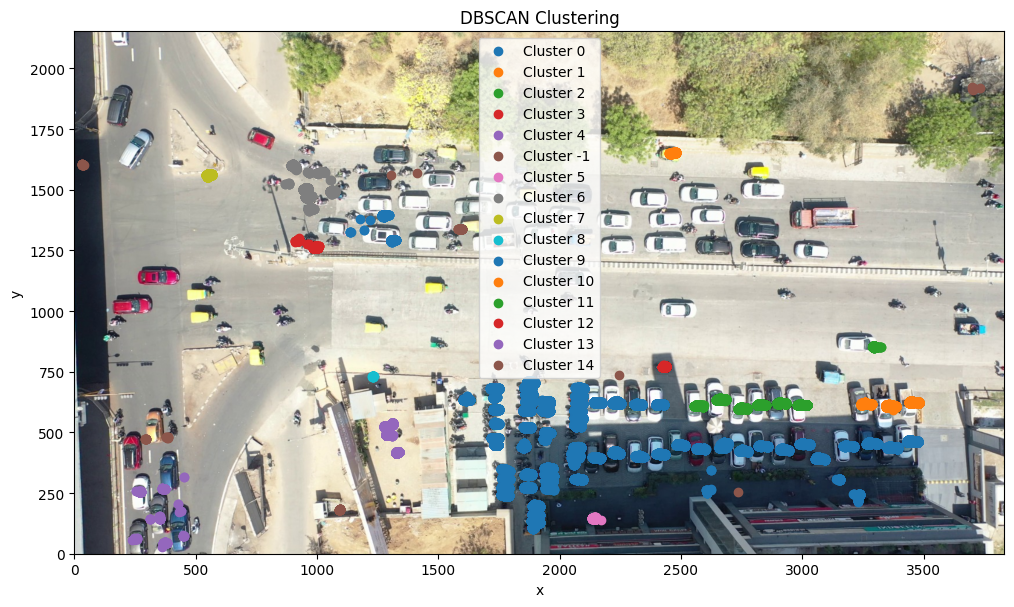

In [10]:
# Load the background image
background_image = mpimg.imread('/kaggle/input/bgimage/58d7720a-9cde-4ef8-993d-1d3985598a7c.jpeg')

# Flip the background image vertically
inverted_image = np.flipud(background_image)

plt.figure(figsize=(12, 10))
xmin = 0
xmax = 3833
ymin = 0
ymax = 2153
plt.imshow(inverted_image, extent=[xmin, xmax, ymin, ymax])

# Plot the clustered data
for cluster_label in filtered_data['cluster'].unique():
    cluster_data = filtered_data[filtered_data['cluster'] == cluster_label]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster_label}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()


In [11]:
filtered_data_1 = newData[(newData['label'] == "soft")].copy()
filtered_data_1.drop_duplicates(inplace=True)

In [12]:
# Extract x and y coordinates for clustering
coordinates = filtered_data_1[['x', 'y']]

# Perform Grid Search for optimal eps and min_samples
# best_eps, best_min_samples = None, None
# min_cluster_count = float('inf')

# for eps in range(1, 30, 2):  # Lower eps values
#     for min_samples in range(3, 30):  # Higher min_samples values
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         clusters = dbscan.fit_predict(coordinates)

#         cluster_counts = pd.Series(clusters).value_counts()
#         noise_count = cluster_counts.get(-1, 0)

#         if noise_count < min_cluster_count or \
#            (noise_count == min_cluster_count and len(cluster_counts) < len(best_clusters)):
#             min_cluster_count = noise_count
#             best_eps = eps
#             best_min_samples = min_samples
#             best_clusters = clusters

# Perform clustering with optimal parameters
dbscan = DBSCAN(eps=100, min_samples=100)
clusters = dbscan.fit_predict(coordinates)

# Add cluster labels to the filtered data
filtered_data_1['cluster'] = clusters

In [13]:
# Get the range of coordinates for each cluster
cluster_ranges = {}
for cluster_label in filtered_data_1['cluster'].unique():
    cluster_data = filtered_data_1[filtered_data_1['cluster'] == cluster_label]
    x_min, x_max = cluster_data['x'].min(), cluster_data['x'].max()
    y_min, y_max = cluster_data['y'].min(), cluster_data['y'].max()
    cluster_ranges[cluster_label] = {'x_min': x_min, 'x_max': x_max, 'y_min': y_min, 'y_max': y_max}

# Print the range of coordinates for each cluster
for cluster_label, coord_range in cluster_ranges.items():
    print(f'Cluster {cluster_label}:')
    print(f'x range: {coord_range["x_min"]} - {coord_range["x_max"]}')
    print(f'y range: {coord_range["y_min"]} - {coord_range["y_max"]}')
    print()


Cluster -1:
x range: 36.0 - 3824.0
y range: 36.0 - 1862.0

Cluster 0:
x range: 1080.0 - 1563.0
y range: 756.0 - 907.0

Cluster 1:
x range: 893.0 - 1297.0
y range: 1319.0 - 1647.0

Cluster 2:
x range: 1767.0 - 1795.0
y range: 389.0 - 586.0

Cluster 4:
x range: 253.0 - 444.0
y range: 41.0 - 313.0

Cluster 3:
x range: 2149.0 - 2333.0
y range: 720.0 - 851.0

Cluster 5:
x range: 1115.0 - 1144.0
y range: 1269.0 - 1391.0

Cluster 6:
x range: 212.0 - 450.0
y range: 450.0 - 618.0

Cluster 7:
x range: 1372.0 - 1614.0
y range: 1393.0 - 1568.0

Cluster 8:
x range: 844.0 - 858.0
y range: 884.0 - 898.0

Cluster 9:
x range: 1445.0 - 1451.0
y range: 1274.0 - 1280.0

Cluster 10:
x range: 1734.0 - 1815.0
y range: 1303.0 - 1581.0

Cluster 11:
x range: 1921.0 - 1982.0
y range: 1305.0 - 1469.0

Cluster 12:
x range: 1556.0 - 1560.0
y range: 1281.0 - 1285.0

Cluster 13:
x range: 2050.0 - 2318.0
y range: 1249.0 - 1480.0

Cluster 14:
x range: 2253.0 - 2706.0
y range: 1282.0 - 1541.0

Cluster 15:
x range: 2446.

In [14]:
test = newData[(newData['label'] != "soft")]

In [15]:
# Dictionary to store the sum and count of Vxy_smoothed for each cluster
cluster_vxy_sum = {}
cluster_vxy_count = {}

# Iterate through each row in the newData dataframe
for index, row in test.iterrows():
    x_coord = row['x']
    y_coord = row['y']
    vxy_smoothed = row['Vxy_smoothed']

    # Check if the point lies within any cluster's range
    for cluster_label, cluster_range in cluster_ranges.items():
        if cluster_range['x_min'] <= x_coord <= cluster_range['x_max'] and \
           cluster_range['y_min'] <= y_coord <= cluster_range['y_max']:
            # Update sum and count for the cluster
            cluster_vxy_sum[cluster_label] = cluster_vxy_sum.get(cluster_label, 0) + vxy_smoothed
            cluster_vxy_count[cluster_label] = cluster_vxy_count.get(cluster_label, 0) + 1
            break  # Exit the loop once the point is found to be within a cluster's range

# Dictionary to store the average Vxy_smoothed for each cluster
cluster_vxy_avg = {}

# Calculate average for each cluster
for cluster_label in cluster_vxy_sum:
    cluster_vxy_avg[cluster_label] = cluster_vxy_sum[cluster_label] / cluster_vxy_count[cluster_label]

# Print the average value of Vxy_smoothed for each cluster
for cluster_label, avg_vxy in cluster_vxy_avg.items():
    print(f'Cluster {cluster_label}: Average Vxy_smoothed = {avg_vxy}')


Cluster -1: Average Vxy_smoothed = 4.863514813141281


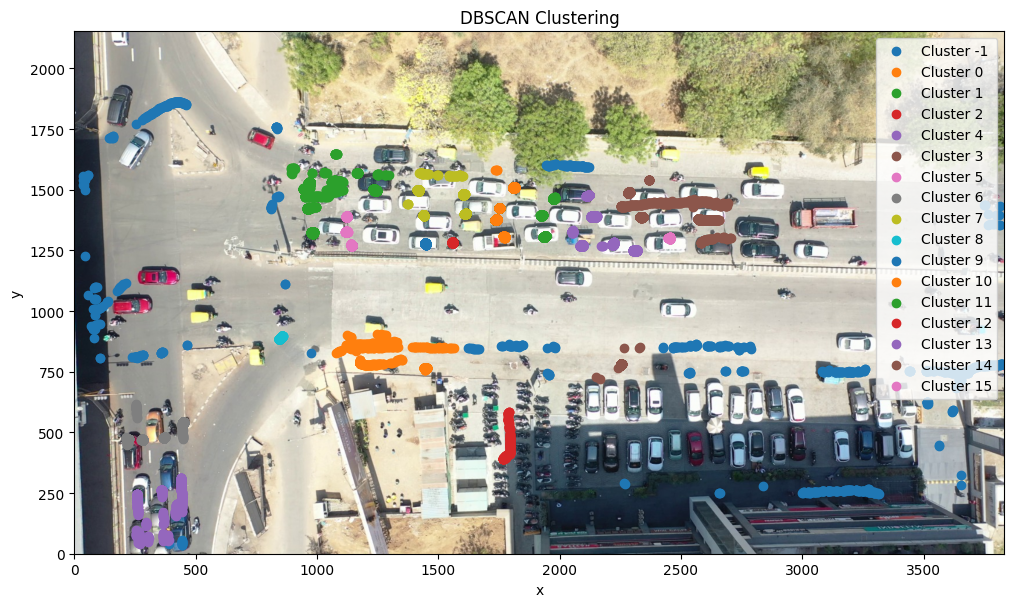

In [16]:
# Load the background image
background_image = mpimg.imread('/kaggle/input/bgimage/58d7720a-9cde-4ef8-993d-1d3985598a7c.jpeg')

# Flip the background image vertically
inverted_image = np.flipud(background_image)

plt.figure(figsize=(12, 10))
xmin = 0
xmax = 3833
ymin = 0
ymax = 2153
plt.imshow(inverted_image, extent=[xmin, xmax, ymin, ymax])

# Plot the clustered data
for cluster_label in filtered_data_1['cluster'].unique():
    cluster_data = filtered_data_1[filtered_data_1['cluster'] == cluster_label]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster_label}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()
